# Project Part 1
# Marco Meraz

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

## Introduction/Background

Social media gives us with the ability to stay in touch with loved ones and to create new communities. This has brought up many new issues of toxic and hateful speech on these platforms. Finding hateful comments and get them taken them down from these platforms would bring down the negativity and hate going on these platforms. The goal of this NLP problem is to detect hateful/toxic speech on social media and take action to improve the positivity on social media. The dataset used for this model will be a set of comments from YouTube about the Ferguson unrest of 2014. We will look into the dataset and train a model to classify comments as toxic or not toxic. After the model is finished we should expect to use another dataset of comments and classify them as toxic or not toxic. In part 1 of the project we will analyze the dataset to see if there are any patterns that we can recognize that will help us in the coming up parts of the project.

## Exploratory Data Analysis

In [128]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
df = pd.read_csv("youtoxic_english_1000.csv")
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
# Checing how many toxic comments are in the dataset
df['IsToxic'].value_counts()

False    538
True     462
Name: IsToxic, dtype: int64

In [130]:
# Converting data set to String type
df['Text'] = df['Text'].astype(str)
df = df[~df["Text"].isnull()]

In [131]:
# Special character cleaning
def clean(txt):
    txt = txt.str.replace("()", "")
    txt = txt.str.replace('(<a).*(>).*()', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txtdf['Text'] == clean(df['Text'])

# Converting to lower case
df['cleanText'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['cleanText'].head()

0    if only people would just take a step back and...
1    law enforcement is not trained to shoot to app...
2    dont you reckon them 'black lives matter' bann...
3    there are a very large number of people who do...
4    the arab dude is absolutely right, he should h...
Name: cleanText, dtype: object

In [132]:
# Removing punctiation
df['cleanText'] = df['cleanText'].str.replace('[^\w\s]', '')
df['cleanText'].head()

/var/folders/zc/w3_gp3bj2r75g6hkvhz1zd4w0000gn/T/ipykernel_1415/2948460505.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanText'] = df['cleanText'].str.replace('[^\w\s]', '')


0    if only people would just take a step back and...
1    law enforcement is not trained to shoot to app...
2    dont you reckon them black lives matter banner...
3    there are a very large number of people who do...
4    the arab dude is absolutely right he should ha...
Name: cleanText, dtype: object

In [133]:
# Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['cleanText'] = df['cleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['cleanText'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcomeraz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    people would take step back make case wasnt an...
1    law enforcement trained shoot apprehend traine...
2    dont reckon black lives matter banners held wh...
3    large number people like police officers calle...
4    arab dude absolutely right shot 6 extra time s...
Name: cleanText, dtype: object

In [134]:
#Finding the rare words in the dataset
freq = pd.Series(' '.join(df['cleanText']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['1622',
 'vomit',
 'punching',
 'dibby',
 'moderate',
 'placing',
 '5th',
 'physical',
 'trustworthy',
 'squared',
 'profession',
 'shibby',
 'prowess',
 'fn',
 'ignoramus',
 'providing',
 'ribs',
 'ofc',
 'dore',
 'policekick',
 'text',
 'firemen',
 'haha',
 'pedal',
 'censor',
 'mustard',
 'ruling',
 'uniform',
 'thy',
 'alllivesmatter',
 'steaming',
 '10th',
 'mdrfckrs',
 'scrubsscrew',
 'jobswhat',
 'joes',
 'moronic',
 'mmh',
 '353',
 'dothey',
 'outthat',
 'deported',
 'aptitude',
 'snl',
 'juries',
 'soldiers',
 'firearms',
 'misread',
 'episode',
 'dies',
 'enjoys',
 'plate',
 'license',
 'nothin',
 'dimwad',
 'gloves',
 'sjws',
 'realizes',
 'httpkuvatuusisuomifisitesdefaultfilesimagecacheartikkelikuva_stdkuvatvicdan0002jpg',
 'surprisedwhen',
 'zone',
 'buffer',
 'disband',
 'resistant',
 'videothat',
 'citation',
 'eating',
 'cuts',
 'socket',
 'thai',
 'eloquently',
 'pathetically',
 'infrastructure',
 'pulls',
 'casters',
 'cutresistant',
 'airline',
 'coal',
 'host',
 'i

In [117]:
# Here we remove those rare words from the dataset
df['cleanText'] = df['cleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
df['cleanText'].head()

0    people would take step back make case wasnt an...
1    law enforcement trained shoot apprehend traine...
2    dont black lives matter held white cunts kinda...
3    large number people like police officers calle...
4    arab dude absolutely right shot 6 time shoot h...
Name: cleanText, dtype: object

In [135]:
# Correcting any spelling mistake in the dataset
from textblob import TextBlob, Word, Blobber

df['cleanText'].apply(lambda x: str(TextBlob(x).correct()))
df['cleanText'].head()

0    people would take step back make case wasnt an...
1    law enforcement trained shoot apprehend traine...
2    dont reckon black lives matter banners held wh...
3    large number people like police officers calle...
4    arab dude absolutely right shot 6 extra time s...
Name: cleanText, dtype: object

In [136]:
# Stemming words in the dataset
from nltk.stem import PorterStemmer

st = PorterStemmer()
df['cleanText'] = df['cleanText'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['cleanText'].head()

0    peopl would take step back make case wasnt any...
1    law enforc train shoot apprehend train shoot k...
2    dont reckon black live matter banner held whit...
3    larg number peopl like polic offic call crimin...
4    arab dude absolut right shot 6 extra time shoo...
Name: cleanText, dtype: object

In [137]:
# Removing punctuation since stemming brought it back
df['cleanText'] = df['cleanText'].str.replace('[^\w\s]', '')
df['cleanText'].head()

/var/folders/zc/w3_gp3bj2r75g6hkvhz1zd4w0000gn/T/ipykernel_1415/437035391.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleanText'] = df['cleanText'].str.replace('[^\w\s]', '')


0    peopl would take step back make case wasnt any...
1    law enforc train shoot apprehend train shoot k...
2    dont reckon black live matter banner held whit...
3    larg number peopl like polic offic call crimin...
4    arab dude absolut right shot 6 extra time shoo...
Name: cleanText, dtype: object

In [138]:
# Adding the length of the text and the word count of each comment.
df['text_len'] = df['Text'].astype(str).apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))


df['polarity'] = df['cleanText'].map(lambda text: TextBlob(text).sentiment.polarity)
df[['cleanText','IsToxic','text_len', 'word_count', 'polarity']]

,cleanText,IsToxic,text_len,word_count,polarity
0,peopl would take step back make case wasnt any...,False,1558,287,-0.073452
1,law enforc train shoot apprehend train shoot k...,True,138,25,0.000000
2,dont reckon black live matter banner held whit...,True,420,77,0.122559
3,larg number peopl like polic offic call crimin...,False,582,107,0.108939
4,arab dude absolut right shot 6 extra time shoo...,False,243,47,0.142857
...,...,...,...,...,...
995,rememb sent nation defenc,False,55,10,0.000000
996,stat dont repres problem race bait attitud who...,True,209,40,0.250000
997,quot mother wow hit hard accur,False,62,11,-0.095833
998,video racist,False,23,5,0.000000


array([[<AxesSubplot: title={'center': 'text_len'}>,
        <AxesSubplot: title={'center': 'word_count'}>],
       [<AxesSubplot: title={'center': 'polarity'}>, <AxesSubplot: >]],
      dtype=object)

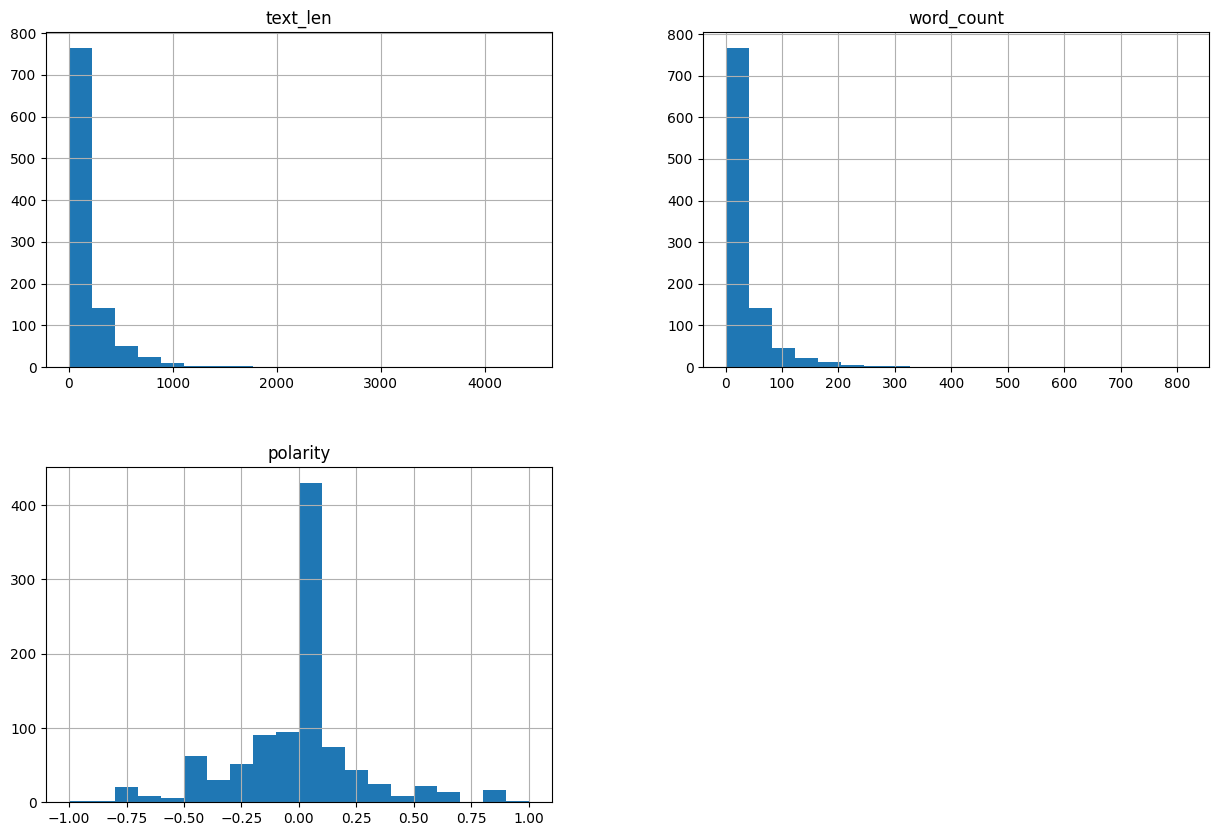

In [139]:
# distributions of word count, text lenght, and polarity
import matplotlib
df[["text_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
#find the top words in the dataset
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['cleanText'], 20)    
df1 = pd.DataFrame(common_words, columns = ['cleanText', 'count'])
df1.head()


,cleanText,count
0,black,302
1,peopl,260
2,get,184
3,polic,177
4,like,166


<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

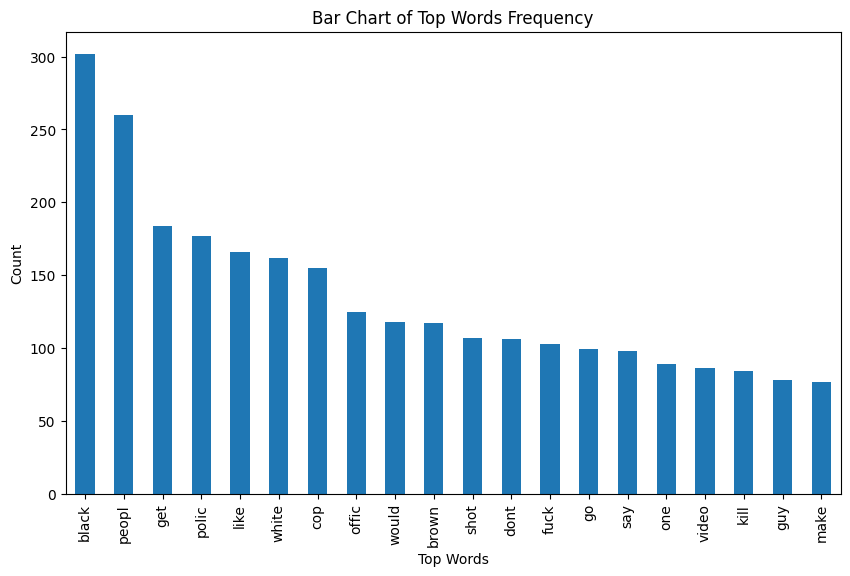

In [142]:
#frequency chart for top words
df1.groupby('cleanText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [143]:
# Here we fgind the topmost frequent bigrams to understand patterns from the dataset
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['cleanText'], 30)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2.head()

,Text,Count
0,black peopl,49
1,polic offic,41
2,michael brown,34
3,white peopl,32
4,mike brown,26


<AxesSubplot: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

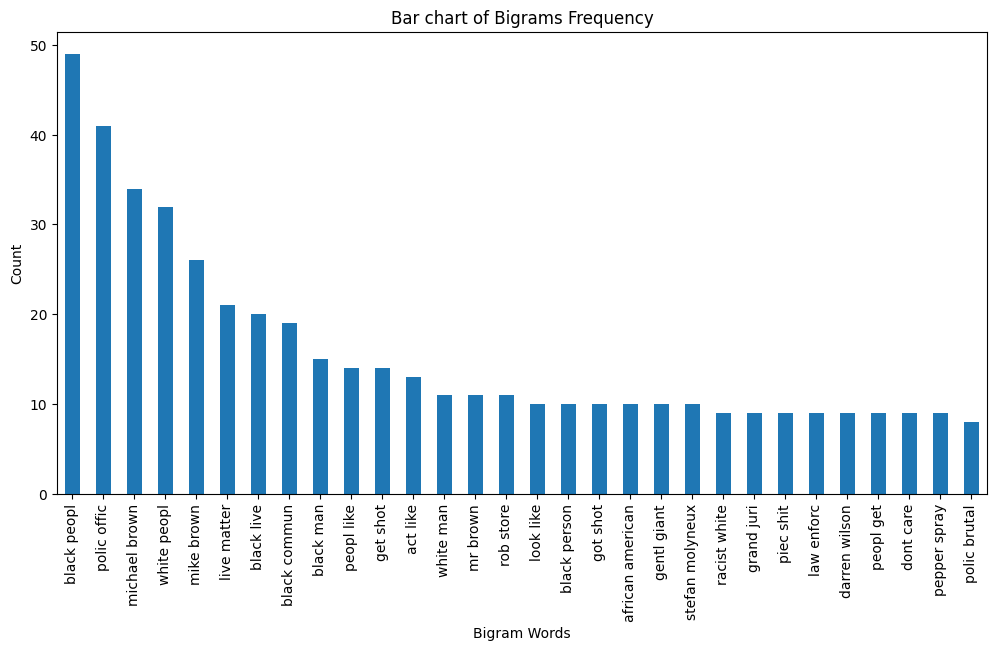

In [146]:
# Bar chart of bigrams frequency
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)